# Telco Customer Churn Analysis
Internship Assessment Submission

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

df = pd.read_csv('Task.csv')
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
1,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
2,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
3,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
4,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices


## Data Understanding and Cleaning

In [ ]:

missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent


In [ ]:

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df = df.dropna()


## Exploratory Data Analysis

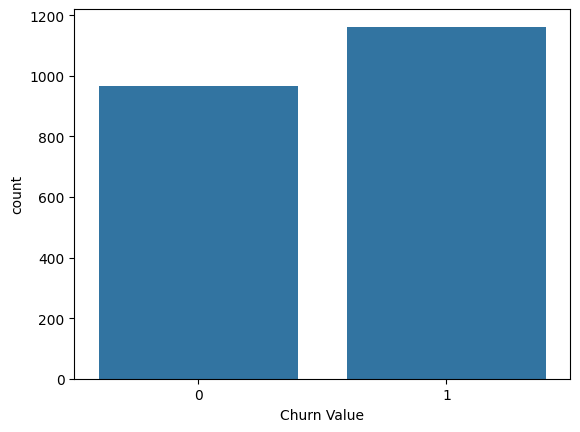

In [6]:

sns.countplot(x='Churn Value', data=df)
plt.show()


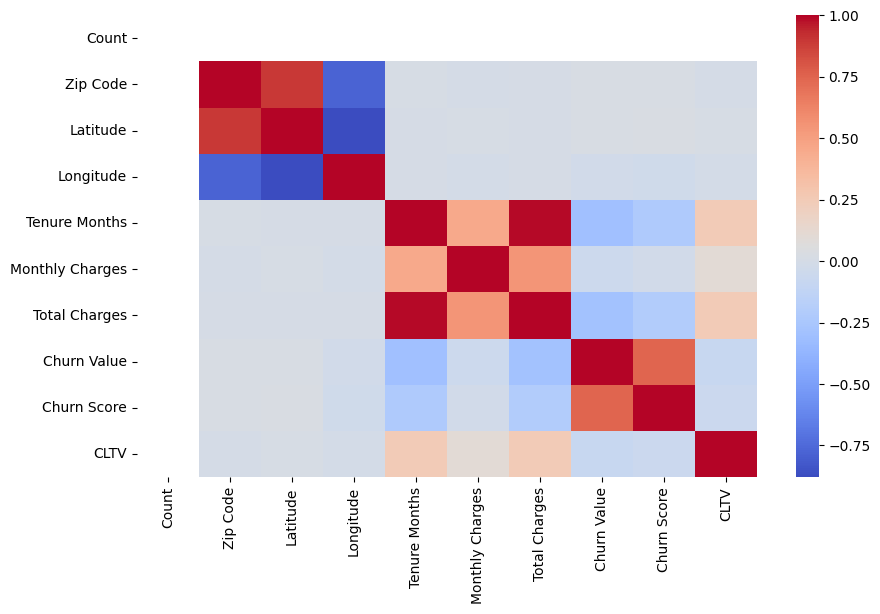

In [7]:

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.show()


## Feature Engineering and Model

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[['Tenure Months','Monthly Charges','Total Charges']]
y = df['Churn Value']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.47      0.53       188
           1       0.64      0.76      0.70       238

    accuracy                           0.63       426
   macro avg       0.63      0.61      0.61       426
weighted avg       0.63      0.63      0.62       426



## Insights and Recommendations
- High churn for short tenure customers
- Month-to-month contracts churn more
- Recommend loyalty offers and long-term plans